# 특성 스케일 맞추기

scikit-learn에서는 다음과 같은 스케일링 클래스를 제공한다.

* StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.
* MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환

In [1]:
import numpy as np

ex = np.array([0, 1, 2, 3, 4, 5])
print('표준화:', (ex - ex.mean()) / ex.std())
print('정규화:', (ex - ex.min()) / (ex.max() - ex.min()))

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화: [0.  0.2 0.4 0.6 0.8 1. ]


# 사이킷런 StandardScaler
사용방법은 다음과 같다.

* (1)`fit` : 학습용 데이터의 분포 추정, 학습용 데이터를 입력으로 하여 fit 메서드를 실행하면 분포 모수를 객체내에 저장 
* (2)`transform` : 학습용 데이터 변환, 학습용 데이터를 입력으로 하여 transform 메서드를 실행하면 학습용 데이터를 변환 
* (3)`fit_transform` : (1)번과 (2)번 과정을 합쳐서 fit_transform 메서드를 사용할 수도 있다.
* 학습용 데이터에는 fit_transform()메서드를 적용하고, 테스트 데이터에는 transform()메서드를 적용

train data와 test data가 다른 스케일로 조정되면 훈련된 모형이 test data를 잘못 인식하여 정확한 성능 평가가 이루어지지 않는다. 따라서 train data와 test data는 같은 비율로 전처리 되어야 한다.


In [2]:
?scaler.fit_transform

Object `scaler.fit_transform` not found.


In [3]:
from sklearn.preprocessing import StandardScaler


X_train = np.array([0, 1, 2, 3, 4, 5])
X_test = np.array([0,10,20,30,40,50])
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train.reshape(-1,1))
X_test_std = scaler.transform(X_test.reshape(-1,1))

print(X_train_std)
print(X_test_std)

[[-1.46385011]
 [-0.87831007]
 [-0.29277002]
 [ 0.29277002]
 [ 0.87831007]
 [ 1.46385011]]
[[-1.46385011]
 [ 4.39155033]
 [10.24695077]
 [16.1023512 ]
 [21.95775164]
 [27.81315208]]


# 스케일 조정 효과

데이터의 스케일을 조정하면 조정하지 않을때 보다 학습이 잘 이루어져 모형의 정확도가 향상된다.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=0)
print(X_train.shape)


(426, 30)


In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

사이킷런에서 제공하는 유방암 데이터셋에는 스케일이 매우 다른 특성변수가 있다.

In [6]:
X_train.reshape(-1,1)

array([[12.31   ],
       [16.52   ],
       [79.19   ],
       ...,
       [ 0.08278],
       [ 0.2829 ],
       [ 0.08832]])

['mean perimeter' 'mean area']


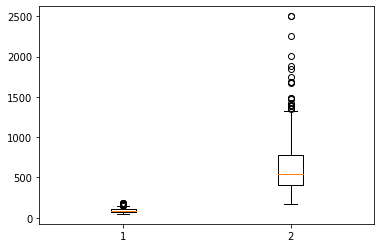

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

print(cancer.feature_names[[2,3]])

plt.boxplot(X_train[:,2:4])
plt.show()

### 데이터 스케일 조정을 하지 않는 경우

In [8]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print('test accuracy: %.3f'%(svc.score(X_test, y_test)))

test accuracy: 0.629


### 데이터 스케일을 조정한 경우

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

svc.fit(X_train_scale, y_train)

print('test accuracy: %.3f'%(svc.score(X_test_scale, y_test)))

test accuracy: 0.951


데이터의 스케일을 조정하여 모형의 성능이 개선되었다.